# Create plots from openebench results

In [1]:
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch
from matplotlib import cm
from matplotlib.ticker import MultipleLocator, FuncFormatter

In [2]:
#read in json files
def read_json(file_path):
    file = open(file_path, 'r')
    data = json.loads(file)
    return data

In [3]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+0.02, point['y'], str(point['val']))

In [4]:
def all_json_to_dataframe(data_directory, challenge, x_value, y_value, run, error_bars = False, label_points = False):
    tools = []
    x_values = []
    x_errors = []
    y_values = []
    y_errors = []
    for filename in os.listdir(data_directory):
        if filename.endswith('.json'):
            with open(os.path.join(data_directory, filename), 'r') as file:
                data = json.load(file)
                for i in data:
                    try:
                        if i['challenge_id'] == challenge:
                            #tools.append(i['participant_id'])
                            metrics = i["metrics"]
                            if metrics['metric_id'] == x_value:
                                x_values.append(metrics['value'])
                                x_errors.append(metrics['stderr'])
                            else:
                                y_values.append(metrics['value'])
                                y_errors.append(metrics['stderr'])
                    except KeyError:
                        try:
                            #print(i)
                            if i["id"] == challenge:
                                tools.append(i['participants'][0])
                        except KeyError:
    
                            continue
    df_dict = {'x': x_values, 'y': y_values, 'tools': tools}
    df = pd.DataFrame(df_dict)
    df.sort_values(by=['tools'], inplace=True)
    # Plotting
    sns.set(style="whitegrid")

    plt.figure(figsize=(8, 6))
    # Scatterplot
    plot = sns.scatterplot(data = df, x='x', y='y', hue='tools', legend='full', style='tools', s=100)

    if error_bars == True:
        # Error bars for x
        for i, tool in enumerate(tools):
            plt.errorbar(x_values[i], y_values[i], xerr=x_errors[i], fmt='none', capsize=5, color='gray')
    
        # Error bars for y
        for i, tool in enumerate(tools):
            plt.errorbar(x_values[i], y_values[i], yerr=y_errors[i], fmt='none', capsize=5, color='gray')

    if label_points == True:
        label_point(df.x, df.y, df.tools, plot.figure.gca()) 

    plt.title(challenge)
    plt.xlabel(x_value)
    plt.ylabel(y_value)
    plt.legend(title='Tools', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    plt.tight_layout()
    #plt.show()
    plt.savefig('QfO_benchmarking_service_plots/figures_review_nar/zoomed_out/' + challenge + '_'  + run +  '.svg', dpi=900, bbox_inches='tight')                    
    return tools, x_values, y_values, x_errors, y_errors, df
                
                

### fA vs BUSCO

['compleasm', 'metaphors', 'orthoffgc', 'orthoinspector', 'inparanoid', 'bbh', 'rsd', 'orthofinder', 'domainoid', 'fDOG-Assembly_augustus', 'fdog_assembly_metazoa_metaeuk_sens', 'BUSCO_metaeuk', 'OMA_pairs', 'ensembl', 'sonicparanoid', 'panther', 'hieranoid', 'BUSCO_augustus_species'] [266, 265, 274, 287, 285, 281, 271, 287, 289, 262, 255, 253, 275, 278, 287, 287, 281, 248] [0.99272499, 0.99305344, 0.99658704, 0.99674163, 0.99671876, 0.99667206, 0.99654925, 0.99674163, 0.99676418, 0.99078269, 0.99241117, 0.98444604, 0.99732263, 0.98684546, 0.99674163, 0.99674163, 0.99667206, 0.97302748] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0.0082601473, 0.006242683, 0.0036097445, 0.0034462439, 0.003470427, 0.003519826, 0.003649703, 0.0034462439, 0.0034223955, 0.0094409748, 0.0086167713, 0.013938295, 0.0033111189, 0.0094410438, 0.0034462439, 0.0034462439, 0.003519826, 0.019515502]


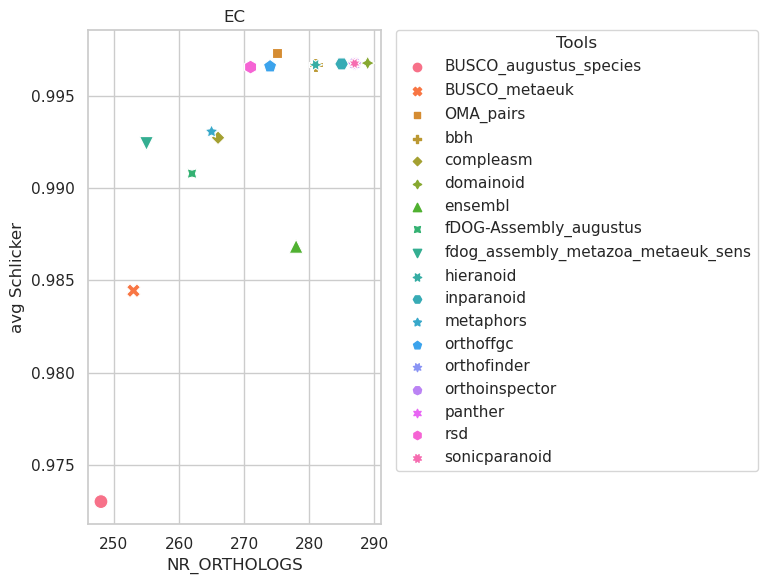

In [5]:
data_directory = "../openebench_output/with_new_chicken_status_dez_2025/"
tools, x_values, y_values, x_errors, y_errors, df_ec = all_json_to_dataframe(data_directory, "EC", "NR_ORTHOLOGS", "avg Schlicker", "fA_vs_BUSCO", error_bars=False, label_points=False)
print(tools, x_values, y_values, x_errors, y_errors)

['compleasm', 'metaphors', 'orthoffgc', 'orthoinspector', 'inparanoid', 'bbh', 'rsd', 'orthofinder', 'domainoid', 'fDOG-Assembly_augustus', 'fdog_assembly_metazoa_metaeuk_sens', 'BUSCO_metaeuk', 'OMA_pairs', 'ensembl', 'sonicparanoid', 'panther', 'hieranoid', 'BUSCO_augustus_species'] [1025, 1067, 980, 1065, 1029, 1045, 1023, 1067, 1061, 995, 975, 1005, 979, 1015, 1071, 1061, 1019, 973] [0.53673145, 0.53398708, 0.53761905, 0.53777219, 0.53750224, 0.53822601, 0.53717637, 0.53655062, 0.53810734, 0.53378125, 0.5351356, 0.53385522, 0.5391645, 0.53551794, 0.53828292, 0.53806423, 0.53829849, 0.52735585] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0.014779561, 0.014562319, 0.014848296, 0.014471396, 0.014754889, 0.01460558, 0.014745572, 0.014506484, 0.014478587, 0.014879763, 0.015049486, 0.014904888, 0.015080482, 0.014849337, 0.014398872, 0.014439245, 0.01477709, 0.015458021]


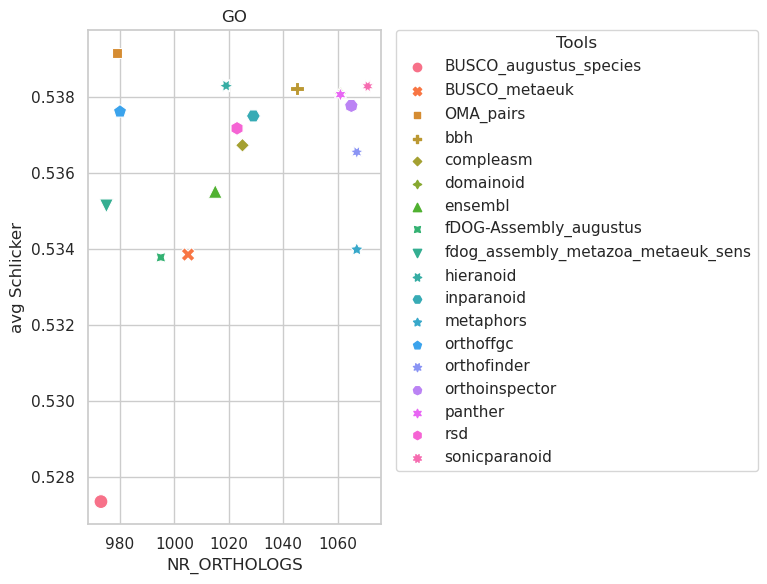

In [6]:
data_directory = "../openebench_output/with_new_chicken_status_dez_2025/"
tools, x_values, y_values, x_errors, y_errors, df_go = all_json_to_dataframe(data_directory, "GO", "NR_ORTHOLOGS", "avg Schlicker", "fA_vs_BUSCO",error_bars=False, label_points=False)
print(tools, x_values, y_values, x_errors, y_errors)

['compleasm', 'metaphors', 'orthoffgc', 'orthoinspector', 'inparanoid', 'bbh', 'rsd', 'orthofinder', 'domainoid', 'fDOG-Assembly_augustus', 'fdog_assembly_metazoa_metaeuk_sens', 'BUSCO_metaeuk', 'OMA_pairs', 'ensembl', 'sonicparanoid', 'panther', 'hieranoid', 'BUSCO_augustus_species'] [0.015820984, 0.016640488, 0.015593344, 0.016754308, 0.016503904, 0.016435612, 0.01602586, 0.016868128, 0.01670878, 0.015525052, 0.015388468, 0.015206356, 0.015411232, 0.015980332, 0.01670878, 0.016663252, 0.016299028, 0.01488766] [0.95467033, 0.95555556, 0.954039, 0.95584416, 0.95772787, 0.95502646, 0.95392954, 0.95489691, 0.95448635, 0.95518207, 0.95345557, 0.95428571, 0.95486601, 0.95380435, 0.95572917, 0.95188557, 0.95466667, 0.95335277] [0.001650248, 0.0016917438, 0.0016385221, 0.0016974214, 0.0016849037, 0.0016814724, 0.0016607258, 0.0017030788, 0.0016951528, 0.0016349869, 0.0016278919, 0.0016183804, 0.0016290767, 0.0016584035, 0.0016951528, 0.001692881, 0.0016745874, 0.0016015906] [0.021370928, 0.0

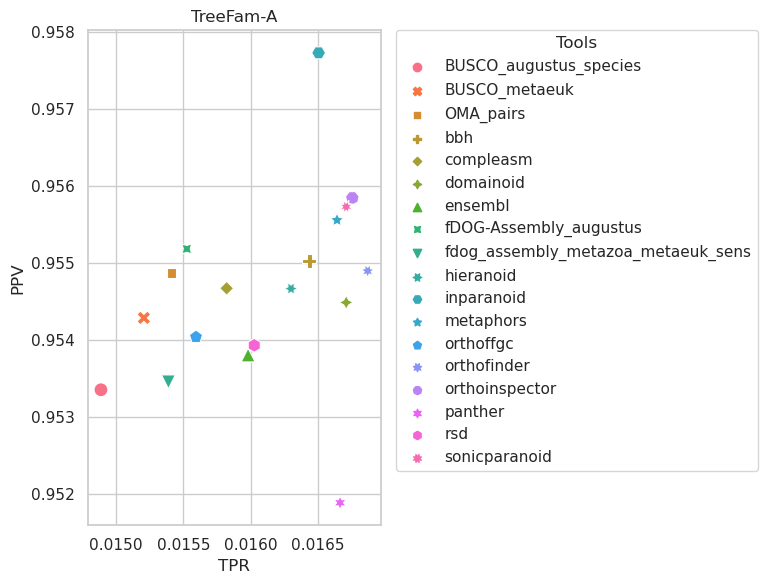

In [7]:
data_directory = "../openebench_output/with_new_chicken_status_dez_2025/"
tools, x_values, y_values, x_errors, y_errors, df_treefam = all_json_to_dataframe(data_directory, "TreeFam-A", "TPR", "PPV","fA_vs_BUSCO")
print(tools, x_values, y_values, x_errors, y_errors)

['compleasm', 'metaphors', 'orthoffgc', 'orthoinspector', 'inparanoid', 'bbh', 'rsd', 'orthofinder', 'domainoid', 'fDOG-Assembly_augustus', 'fdog_assembly_metazoa_metaeuk_sens', 'BUSCO_metaeuk', 'OMA_pairs', 'ensembl', 'sonicparanoid', 'panther', 'hieranoid', 'BUSCO_augustus_species'] [0.031456831, 0.031456831, 0.031456831, 0.031456831, 0.031456831, 0.031456831, 0.031456831, 0.031456831, 0.031456831, 0.031456831, 0.031456831, 0.031456831, 0.031456831, 0.031456831, 0.031456831, 0.031456831, 0.031456831, 0.031456831] [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5] [0.024544056, 0.024544056, 0.024544056, 0.024544056, 0.024544056, 0.024544056, 0.024544056, 0.024544056, 0.024544056, 0.024544056, 0.024544056, 0.024544056, 0.024544056, 0.024544056, 0.024544056, 0.024544056, 0.024544056, 0.024544056] [0.16333333, 0.16333333, 0.16333333, 0.16333333, 0.16333333, 0.16333333, 0.16333333, 0.16333333, 0.16333333, 0.16333333, 0.16333333, 0.16333333, 0.163333

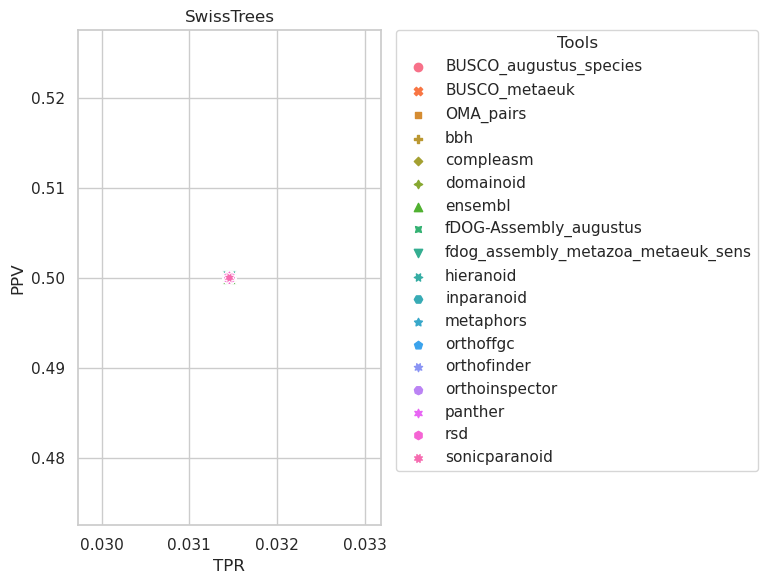

In [8]:
data_directory = "../openebench_output/with_new_chicken_status_dez_2025/"
tools, x_values, y_values, x_errors, y_errors, df_swisstree = all_json_to_dataframe(data_directory, "SwissTrees", "TPR", "PPV", "fA_vs_BUSCO")
print(tools, x_values, y_values, x_errors, y_errors)

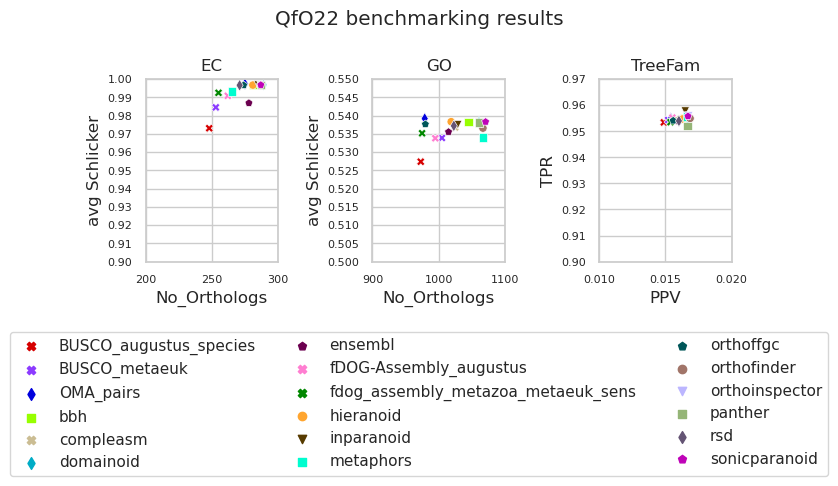

In [9]:
color_dict = {
    'BUSCO_augustus': '#d60000',
    'BUSCO_augustus_species': '#d60000',
    'BUSCO_metaeuk': '#8c3bff', 
    'bbh': '#97ff00', 
    'domainoid': '#00acc6', 
    'ensembl': '#6b004f', 
    'fDOG-Assembly_augustus': '#ff7ed1',
    'fdog_assembly_human_proteom_augustus': '#ff7ed1',
    'fdog_assembly_human_proteom_metaeuk': '#018700',
    'fDOG-Assembly_metaeuk': '#018700', 
    'hieranoid': '#ffa52f', 
    'inparanoid': '#573b00', 
    'metaphors': '#00fdcf', 
    'OMA_pairs': '#0000dd',
    'oma_pairs': '#0000dd',
    'orthoffgc': '#005659', 
    'orthofinder': '#a17569', 
    'orthoinspector': '#bcb6ff', 
    'panther': '#95b577', 
    'rsd': '#645474', 
    'sonicparanoid': '#bf03b8',
    'fDOG-Assembly Augustus': '#ff7ed1',
    'fDOG-Assembly MetaEuk': '#018700',
    'fdog_assembly_metazoa_metaeuk_sens': '#018700',
    'Reference': '#0000dd',
    'compleasm': '#CBBD93'
}

marker_dict = {
    'BUSCO_augustus': 'X',
    'BUSCO_augustus_species': 'X',
    'BUSCO_metaeuk': 'X', 
    'bbh': 's', 
    'domainoid': 'd', 
    'ensembl': 'p', 
    'ensamble': 'p',
    'fDOG-Assembly_augustus': 'X', 
    'fDOG-Assembly_metaeuk': 'X',
    'fdog_assembly_metazoa_metaeuk_sens':'X',
    'hieranoid': 'o', 
    'inparanoid': 'v', 
    'metaphors': 's', 
    'OMA_pairs': 'd',
    'oma_pairs': 'd',
    'orthoffgc': 'p', 
    'orthofinder': 'o', 
    'orthoinspector': 'v', 
    'panther': 's', 
    'rsd': 'd', 
    'sonicparanoid': 'p',
    'fDOG-Assembly Augustus': 'o',
    'fDOG-Assembly MetaEuk': 'v',
    'Reference': 'p',
    'compleasm': 'X'
}
fig, axes = plt.subplots(1, 3, sharex=False,figsize=(7, 3))

fig.suptitle('QfO22 benchmarking results')
group_labels = tools
n_groups = len(tools)

sns.scatterplot(ax=axes[0], data=df_ec, x='x', y='y', hue='tools', style='tools', markers=marker_dict, palette=color_dict)
axes[0].set_title('EC')
axes[0].set_xlabel('No_Orthologs')
axes[0].set_ylabel('avg Schlicker')
axes[0].set_xlim(200, 300)
axes[0].set_ylim(0.9, 1)
axes[0].tick_params(axis='both', which='major', labelsize=8)
axes[0].yaxis.set_major_locator(MultipleLocator(0.01))
sns.scatterplot(ax=axes[1], data=df_go, x='x', y='y', hue='tools', style='tools', markers=marker_dict, palette=color_dict)
axes[1].set_title('GO')
axes[1].set_xlabel('No_Orthologs')
axes[1].set_ylabel('avg Schlicker')
axes[1].set_xlim(900, 1100)
axes[1].set_ylim(0.5, 0.55)
axes[1].tick_params(axis='both', which='major', labelsize=8)
axes[1].yaxis.set_major_locator(MultipleLocator(0.005))
sns.scatterplot(ax=axes[2], data=df_treefam, x='x', y='y', hue='tools', style='tools', markers=marker_dict, palette=color_dict)
axes[2].set_title('TreeFam')
axes[2].set_xlabel('PPV')
axes[2].set_ylabel('TPR')
axes[2].set_xlim(0.01, 00.02)
axes[2].set_ylim(0.90, 0.97)
axes[2].tick_params(axis='both', which='major', labelsize=8)
#axes[2].yaxis.set_major_locator(MultipleLocator(0.001))
handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='lower center')
axes[0].get_legend().remove()
axes[1].get_legend().remove()
axes[2].get_legend().remove()

fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.6))

fig.patch.set_facecolor('white')
plt.subplots_adjust(bottom=0.8)
plt.tight_layout()

# Adjust the subplots with the new bottom values, leaving space for the legend
plt.subplots_adjust(bottom=0.14)
plt.savefig('QfO_benchmarking_service_plots/figures_review_nar/zoomed_out/merged_plots_fA_vs_busco_zoomed_out.svg', dpi=900, bbox_inches='tight')

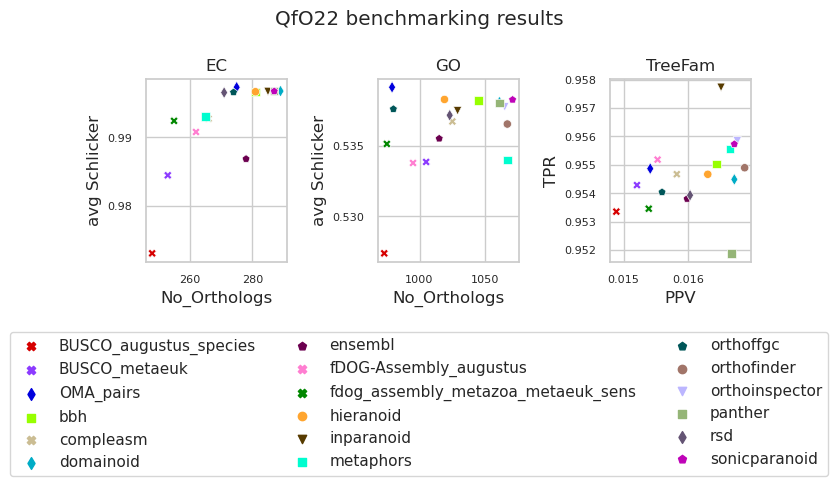

In [10]:
color_dict = {
    'BUSCO_augustus': '#d60000',
    'BUSCO_augustus_species': '#d60000',
    'BUSCO_metaeuk': '#8c3bff', 
    'bbh': '#97ff00', 
    'domainoid': '#00acc6', 
    'ensembl': '#6b004f', 
    'fDOG-Assembly_augustus': '#ff7ed1',
    'fdog_assembly_human_proteom_augustus': '#ff7ed1',
    'fdog_assembly_human_proteom_metaeuk': '#018700',
    'fDOG-Assembly_metaeuk': '#018700', 
    'hieranoid': '#ffa52f', 
    'inparanoid': '#573b00', 
    'metaphors': '#00fdcf', 
    'OMA_pairs': '#0000dd',
    'oma_pairs': '#0000dd',
    'orthoffgc': '#005659', 
    'orthofinder': '#a17569', 
    'orthoinspector': '#bcb6ff', 
    'panther': '#95b577', 
    'rsd': '#645474', 
    'sonicparanoid': '#bf03b8',
    'fDOG-Assembly Augustus': '#ff7ed1',
    'fDOG-Assembly MetaEuk': '#018700',
    'fdog_assembly_metazoa_metaeuk_sens': '#018700',
    'Reference': '#0000dd',
    'compleasm': '#CBBD93'
}

marker_dict = {
    'BUSCO_augustus': 'X',
    'BUSCO_augustus_species': 'X',
    'BUSCO_metaeuk': 'X', 
    'bbh': 's', 
    'domainoid': 'd', 
    'ensembl': 'p', 
    'ensamble': 'p',
    'fDOG-Assembly_augustus': 'X', 
    'fDOG-Assembly_metaeuk': 'X',
    'fdog_assembly_metazoa_metaeuk_sens':'X',
    'hieranoid': 'o', 
    'inparanoid': 'v', 
    'metaphors': 's', 
    'OMA_pairs': 'd',
    'oma_pairs': 'd',
    'orthoffgc': 'p', 
    'orthofinder': 'o', 
    'orthoinspector': 'v', 
    'panther': 's', 
    'rsd': 'd', 
    'sonicparanoid': 'p',
    'fDOG-Assembly Augustus': 'o',
    'fDOG-Assembly MetaEuk': 'v',
    'Reference': 'p',
    'compleasm': 'X'
}
fig, axes = plt.subplots(1, 3, sharex=False,figsize=(7, 3))

fig.suptitle('QfO22 benchmarking results')
group_labels = tools
n_groups = len(tools)

sns.scatterplot(ax=axes[0], data=df_ec, x='x', y='y', hue='tools', style='tools', markers=marker_dict, palette=color_dict)
axes[0].set_title('EC')
axes[0].set_xlabel('No_Orthologs')
axes[0].set_ylabel('avg Schlicker')
#axes[0].set_xlim(200, 300)
#axes[0].set_ylim(0.9, 1)
axes[0].tick_params(axis='both', which='major', labelsize=8)
axes[0].yaxis.set_major_locator(MultipleLocator(0.01))
sns.scatterplot(ax=axes[1], data=df_go, x='x', y='y', hue='tools', style='tools', markers=marker_dict, palette=color_dict)
axes[1].set_title('GO')
axes[1].set_xlabel('No_Orthologs')
axes[1].set_ylabel('avg Schlicker')
#axes[1].set_xlim(900, 1100)
#axes[1].set_ylim(0.5, 0.55)
axes[1].tick_params(axis='both', which='major', labelsize=8)
axes[1].yaxis.set_major_locator(MultipleLocator(0.005))
sns.scatterplot(ax=axes[2], data=df_treefam, x='x', y='y', hue='tools', style='tools', markers=marker_dict, palette=color_dict)
axes[2].set_title('TreeFam')
axes[2].set_xlabel('PPV')
axes[2].set_ylabel('TPR')
#axes[2].set_xlim(0.01, 00.02)
#axes[2].set_ylim(0.90, 0.97)
axes[2].tick_params(axis='both', which='major', labelsize=8)
#axes[2].yaxis.set_major_locator(MultipleLocator(0.001))
handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='lower center')
axes[0].get_legend().remove()
axes[1].get_legend().remove()
axes[2].get_legend().remove()

fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.6))

fig.patch.set_facecolor('white')
plt.subplots_adjust(bottom=0.8)
plt.tight_layout()

# Adjust the subplots with the new bottom values, leaving space for the legend
plt.subplots_adjust(bottom=0.14)
plt.savefig('QfO_benchmarking_service_plots/figures_review_nar/merged_plots_fA_vs_busco.svg', dpi=900, bbox_inches='tight')

### Human Proteom

['inparanoid', 'metaphors', 'oma_pairs', 'orthofinder', 'orthoinspector', 'rsd', 'sonicparanoid', 'bbh', 'domainoid', 'hieranoid', 'orthoffgc', 'panther', 'ensembl', 'fdog_assembly_human_proteom_augustus_50', 'fdog_assembly_human_proteom_metaeuk_sens_50'] [501, 464, 540, 545, 502, 479, 545, 486, 512, 491, 519, 540, 500, 446, 434] [0.99639208, 0.98749506, 0.99130866, 0.988474, 0.99545846, 0.99801494, 0.98320356, 0.99804353, 0.99525739, 0.99645044, 0.99254958, 0.99209752, 0.99004684, 0.99139192, 0.99170588] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0.0029020002, 0.0070334135, 0.005124561, 0.0061086905, 0.0034116781, 0.002042645, 0.0073885447, 0.0020132307, 0.0033400228, 0.0028247194, 0.0045280863, 0.0045958812, 0.0059854115, 0.0059299885, 0.0061165484]


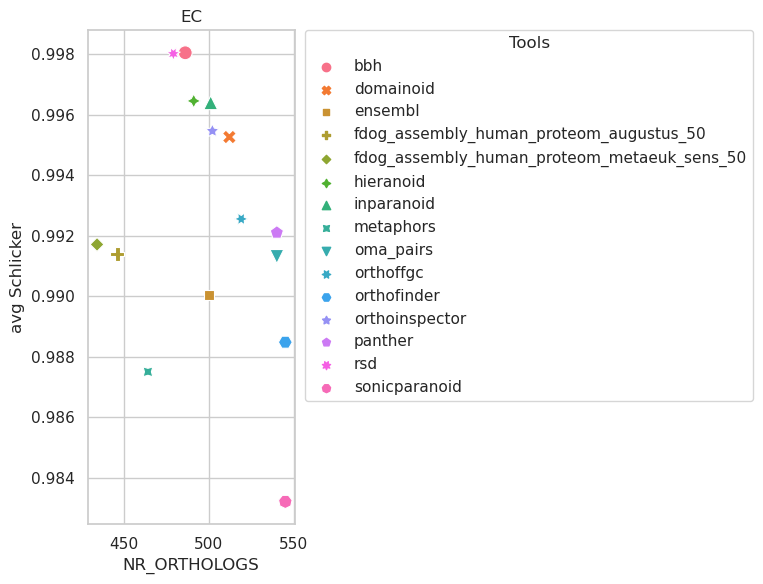

In [20]:
data_directory = "../openebench_output/human_proteom/"
tools, x_values, y_values, x_errors, y_errors, df_ec = all_json_to_dataframe(data_directory, "EC", "NR_ORTHOLOGS", "avg Schlicker", "human_proteom",error_bars=False, label_points=False)
print(tools, x_values, y_values, x_errors, y_errors)

['inparanoid', 'metaphors', 'oma_pairs', 'orthofinder', 'orthoinspector', 'rsd', 'sonicparanoid', 'bbh', 'domainoid', 'hieranoid', 'orthoffgc', 'panther', 'ensembl', 'fdog_assembly_human_proteom_augustus_50', 'fdog_assembly_human_proteom_metaeuk_sens_50'] [1359, 1260, 1405, 1403, 1378, 1321, 1416, 1342, 1405, 1333, 1415, 1416, 1292, 1274, 1237] [0.52390027, 0.52078983, 0.52705895, 0.5260283, 0.52465592, 0.52456572, 0.52647533, 0.5255735, 0.52467545, 0.5241509, 0.522765, 0.52706568, 0.52502206, 0.52009875, 0.52058708] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0.010602703, 0.011155371, 0.010639294, 0.01061453, 0.010586836, 0.010759383, 0.010522824, 0.010673705, 0.010411183, 0.010701519, 0.010416548, 0.010598621, 0.011066095, 0.011139396, 0.011447577]


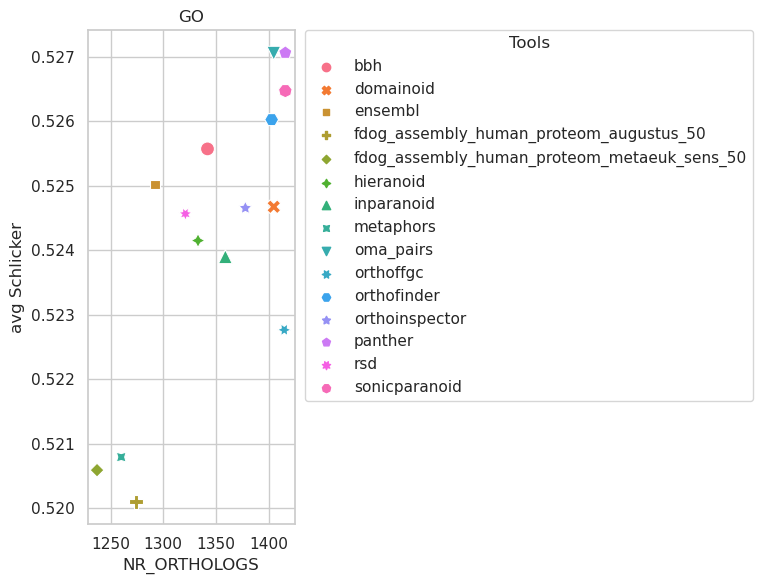

In [21]:
data_directory = "../openebench_output/human_proteom/"
tools, x_values, y_values, x_errors, y_errors, df_go = all_json_to_dataframe(data_directory, "GO", "NR_ORTHOLOGS", "avg Schlicker", "human_proteom",error_bars=False, label_points=False)
print(tools, x_values, y_values, x_errors, y_errors)

['inparanoid', 'metaphors', 'oma_pairs', 'orthofinder', 'orthoinspector', 'rsd', 'sonicparanoid', 'bbh', 'domainoid', 'hieranoid', 'orthoffgc', 'panther', 'ensembl', 'fdog_assembly_human_proteom_augustus_50', 'fdog_assembly_human_proteom_metaeuk_sens_50'] [4.5528011e-05, 4.5528011e-05, 4.5528011e-05, 4.5528011e-05, 4.5528011e-05, 4.5528011e-05, 4.5528011e-05, 4.5528011e-05, 4.5528011e-05, 4.5528011e-05, 4.5528011e-05, 4.5528011e-05, 4.5528011e-05, 4.5528011e-05, 4.5528011e-05] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [8.923287e-05, 8.923287e-05, 8.923287e-05, 8.923287e-05, 8.923287e-05, 8.923287e-05, 8.923287e-05, 8.923287e-05, 8.923287e-05, 8.923287e-05, 8.923287e-05, 8.923287e-05, 8.923287e-05, 8.923287e-05, 8.923287e-05] [0.60728379, 0.60728379, 0.60728379, 0.60728379, 0.60728379, 0.60728379, 0.60728379, 0.60728379, 0.60728379, 0.60728379, 0.60728379, 0.60728379, 0.60728379, 0.60728379, 0.60728379]


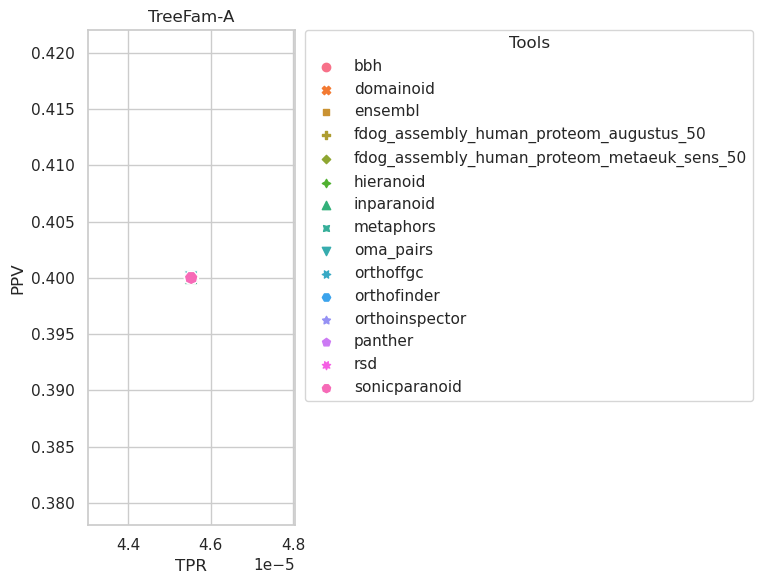

In [22]:
data_directory = "../openebench_output/human_proteom/"
tools, x_values, y_values, x_errors, y_errors, df_treefam = all_json_to_dataframe(data_directory, "TreeFam-A", "TPR", "PPV","human_proteom")
print(tools, x_values, y_values, x_errors, y_errors)

['inparanoid', 'metaphors', 'oma_pairs', 'orthofinder', 'orthoinspector', 'rsd', 'sonicparanoid', 'bbh', 'domainoid', 'hieranoid', 'orthoffgc', 'panther', 'ensembl', 'fdog_assembly_human_proteom_augustus_50', 'fdog_assembly_human_proteom_metaeuk_sens_50'] [0.034411963, 0.034694689, 0.034411963, 0.034694689, 0.034694689, 0.033865086, 0.034411963, 0.034270601, 0.034411963, 0.034411963, 0.033723723, 0.034694689, 0.034289174, 0.034270601, 0.034289174] [0.54537037, 0.54814815, 0.54537037, 0.54814815, 0.54814815, 0.53968254, 0.54537037, 0.54338624, 0.54537037, 0.54537037, 0.53703704, 0.54814815, 0.53703704, 0.54338624, 0.54444444] [0.024720677, 0.024726666, 0.024720677, 0.024726666, 0.024726666, 0.024693395, 0.024720677, 0.024717659, 0.024720677, 0.024720677, 0.024690357, 0.024726666, 0.024702412, 0.024717659, 0.024702412] [0.15418256, 0.15360954, 0.15418256, 0.15360954, 0.15360954, 0.15545997, 0.15418256, 0.15462157, 0.15418256, 0.15418256, 0.15606001, 0.15360954, 0.15464665, 0.15462157, 0.

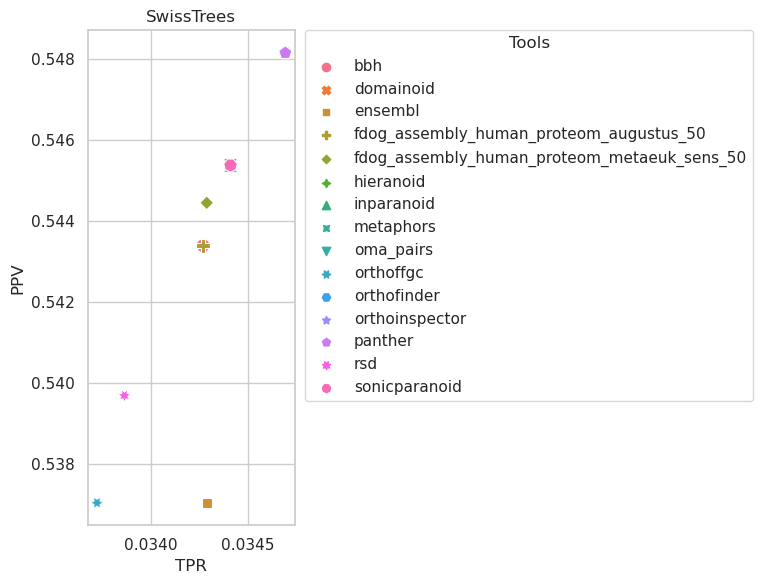

In [23]:
data_directory = "../openebench_output/human_proteom/"
tools, x_values, y_values, x_errors, y_errors, df_swisstree = all_json_to_dataframe(data_directory, "SwissTrees", "TPR", "PPV", "human_proteom")
print(tools, x_values, y_values, x_errors, y_errors)

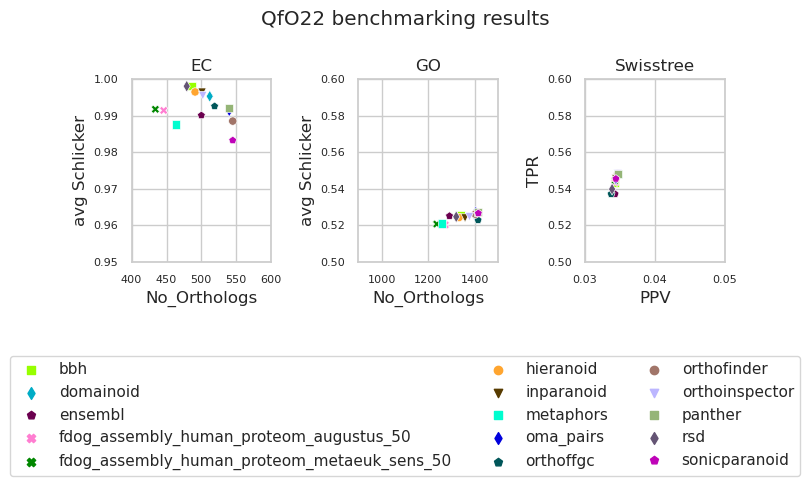

In [29]:
color_dict = {
    'BUSCO_augustus': '#d60000', 
    'BUSCO_metaeuk': '#8c3bff', 
    'bbh': '#97ff00', 
    'domainoid': '#00acc6', 
    'ensembl': '#6b004f', 
    'fDOG-Assembly_augustus': '#ff7ed1',
    'fdog_assembly_human_proteom_augustus': '#ff7ed1',
    'fdog_assembly_human_proteom_metaeuk': '#018700',
    'fDOG-Assembly_metaeuk': '#018700',
    'fdog_assembly_human_proteom_metaeuk_sens_50':'#018700', 
    'fdog_assembly_human_proteom_metaeuk_sens_30':'#018700', 
    'fdog_assembly_human_proteom_augustus_50': '#ff7ed1', 
    'fdog_assembly_human_proteom_augustus_30': '#ff7ed1',
    'hieranoid': '#ffa52f', 
    'inparanoid': '#573b00', 
    'metaphors': '#00fdcf', 
    'OMA_pairs': '#0000dd',
    'oma_pairs': '#0000dd',
    'orthoffgc': '#005659', 
    'orthofinder': '#a17569', 
    'orthoinspector': '#bcb6ff', 
    'panther': '#95b577', 
    'rsd': '#645474', 
    'sonicparanoid': '#bf03b8',
    'fDOG-Assembly Augustus': '#ff7ed1',
    'fDOG-Assembly MetaEuk': '#018700',
    'Reference': '#0000dd',
    'fdog_assembly_metazoa_metaeuk_sens': '#018700'
}

marker_dict = {
    'BUSCO_augustus': 'X', 
    'BUSCO_metaeuk': 'X', 
    'bbh': 's', 
    'domainoid': 'd', 
    'ensembl': 'p', 
    'ensamble': 'p',
    'fDOG-Assembly_augustus': 'X', 
    'fDOG-Assembly_metaeuk': 'X',
    'fdog_assembly_human_proteom_augustus': 'X', 
    'fdog_assembly_human_proteom_metaeuk': 'X',
    'fdog_assembly_metazoa_metaeuk_sens': 'X',
    'fdog_assembly_human_proteom_metaeuk_sens_50':'X', 
    'fdog_assembly_human_proteom_metaeuk_sens_30':'v', 
    'fdog_assembly_human_proteom_augustus_50': 'X', 
    'fdog_assembly_human_proteom_augustus_30': 'v',
    'hieranoid': 'o', 
    'inparanoid': 'v', 
    'metaphors': 's', 
    'OMA_pairs': 'd',
    'oma_pairs': 'd',
    'orthoffgc': 'p', 
    'orthofinder': 'o', 
    'orthoinspector': 'v', 
    'panther': 's', 
    'rsd': 'd', 
    'sonicparanoid': 'p',
    'fDOG-Assembly Augustus': 'o',
    'fDOG-Assembly MetaEuk': 'v',
    'Reference': 'p'
}

fig, axes = plt.subplots(1, 3, sharex=False,figsize=(7, 3))
plt.rcParams.update({'font.size': 12})

fig.suptitle('QfO22 benchmarking results')
group_labels = tools
n_groups = len(tools)

sns.scatterplot(ax=axes[0], data=df_ec, x='x', y='y', hue='tools', style='tools', palette=color_dict, markers=marker_dict)
axes[0].set_title('EC')
axes[0].set_xlabel('No_Orthologs')
axes[0].set_ylabel('avg Schlicker')
axes[0].set_xlim(400, 600)
axes[0].set_ylim(0.95, 1)
axes[0].tick_params(axis='both', which='major', labelsize=8) 
sns.scatterplot(ax=axes[1], data=df_go, x='x', y='y', hue='tools', style='tools', palette=color_dict, markers=marker_dict)
axes[1].set_title('GO')
axes[1].set_xlabel('No_Orthologs')
axes[1].set_ylabel('avg Schlicker')
axes[1].set_xlim(900, 1500)
axes[1].set_ylim(0.5, 0.6)
axes[1].tick_params(axis='both', which='major', labelsize=8) 
sns.scatterplot(ax=axes[2], data=df_swisstree, x='x', y='y', hue='tools', style='tools', palette=color_dict, markers=marker_dict)
axes[2].set_title('Swisstree')
axes[2].set_xlabel('PPV')
axes[2].set_ylabel('TPR')
axes[2].set_xlim(0.03, 0.05)
axes[2].set_ylim(0.5, 0.6)
axes[2].tick_params(axis='both', which='major', labelsize=8) 
handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='lower center')
axes[0].get_legend().remove()
axes[1].get_legend().remove()
axes[2].get_legend().remove()

fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.6))

fig.patch.set_facecolor('white')
plt.subplots_adjust(bottom=0.8)
plt.tight_layout()

# Adjust the subplots with the new bottom values, leaving space for the legend
plt.subplots_adjust(bottom=0.14)
plt.savefig('QfO_benchmarking_service_plots/zoomed_out/merged_plots_fA_human_proteom.svg', dpi=900, bbox_inches='tight') 
     
